# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [10]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : pevek
Processing Record 2 of Set 1 : castro
Processing Record 3 of Set 1 : georgetown
Processing Record 4 of Set 1 : saint-philippe
Processing Record 5 of Set 1 : poso
Processing Record 6 of Set 1 : tabuk
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : kavieng
Processing Record 9 of Set 1 : tuatapere
Processing Record 10 of Set 1 : puerto ayora
Processing Record 11 of Set 1 : benguela
Processing Record 12 of Set 1 : churapcha
Processing Record 13 of Set 1 : cape town
Processing Record 14 of Set 1 : lebu
Processing Record 15 of Set 1 : vrangel
Processing Record 16 of Set 1 : shagonar
Processing Record 17 of Set 1 : ardahan
Processing Record 18 of Set 1 : lorengau
Processing Record 19 of Set 1 : alappuzha
Processing Record 20 of Set 1 : kodinsk
Processing Record 21 of Set 1 : alibag
Processing Record 22 of Set 1 : port alfred
City not found. Skipping...
Processing Record 23 of S

City not found. Skipping...
Processing Record 33 of Set 4 : deputatskiy
Processing Record 34 of Set 4 : mango
Processing Record 35 of Set 4 : ituporanga
Processing Record 36 of Set 4 : yinchuan
Processing Record 37 of Set 4 : hamilton
Processing Record 38 of Set 4 : sitka
Processing Record 39 of Set 4 : brae
Processing Record 40 of Set 4 : teguise
Processing Record 41 of Set 4 : redcar
Processing Record 42 of Set 4 : shasta lake
Processing Record 43 of Set 4 : necochea
Processing Record 44 of Set 4 : saint-pierre
Processing Record 45 of Set 4 : manono
Processing Record 46 of Set 4 : grindavik
Processing Record 47 of Set 4 : port-gentil
Processing Record 48 of Set 4 : luan
Processing Record 49 of Set 4 : san roque
Processing Record 50 of Set 4 : mbandaka
Processing Record 0 of Set 5 : bambous virieux
Processing Record 1 of Set 5 : guerrero negro
Processing Record 2 of Set 5 : furano
Processing Record 3 of Set 5 : beloha
City not found. Skipping...
Processing Record 4 of Set 5 : barstow


Processing Record 19 of Set 8 : ust-nera
Processing Record 20 of Set 8 : lexington
Processing Record 21 of Set 8 : acapulco
Processing Record 22 of Set 8 : tecoanapa
Processing Record 23 of Set 8 : yichun
Processing Record 24 of Set 8 : walvis bay
Processing Record 25 of Set 8 : chifeng
Processing Record 26 of Set 8 : evensk
Processing Record 27 of Set 8 : atasu
Processing Record 28 of Set 8 : progreso
Processing Record 29 of Set 8 : inowroclaw
Processing Record 30 of Set 8 : mayumba
Processing Record 31 of Set 8 : cabo san lucas
Processing Record 32 of Set 8 : nantucket
Processing Record 33 of Set 8 : cockburn town
Processing Record 34 of Set 8 : bharuch
Processing Record 35 of Set 8 : asau
Processing Record 36 of Set 8 : mazamet
Processing Record 37 of Set 8 : yarkovo
Processing Record 38 of Set 8 : beira
Processing Record 39 of Set 8 : puerto el triunfo
Processing Record 40 of Set 8 : mumford
Processing Record 41 of Set 8 : zhigansk
Processing Record 42 of Set 8 : middletown
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
weather_data.to_csv("cities.csv", index=False)

In [16]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,30.16,70,77,17.60,RU,1618804533
1,Castro,-24.7911,-50.0119,54.93,97,31,5.95,BR,1618804533
2,George Town,5.4112,100.3354,87.80,70,40,3.44,MY,1618804533
3,Saint-Philippe,-21.3585,55.7679,78.80,83,90,12.66,RE,1618804533
4,Poso,-1.3959,120.7524,84.06,63,100,2.66,ID,1618804423
...,...,...,...,...,...,...,...,...,...
548,Kollam,8.8833,76.6000,87.80,74,20,5.75,IN,1618804654
549,Undory,54.6085,48.3928,37.40,52,98,11.18,RU,1618804655
550,Balod,20.7300,81.2047,97.52,14,71,3.36,IN,1618804655
551,Taizhou,32.4933,119.9106,68.95,37,0,8.59,CN,1618804655


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
Humidity_Value = weather_data.loc[weather_data['Humidity'] > 100]
len(Humidity_Value)


0

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

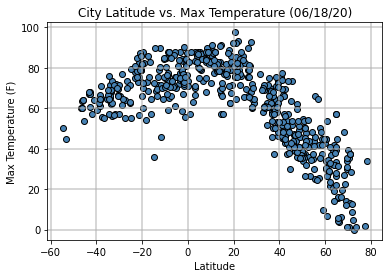

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
# plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

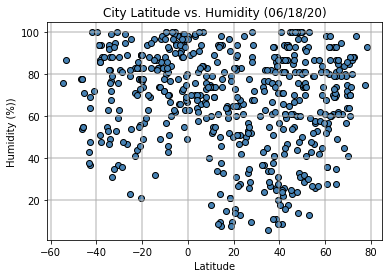

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
#plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
#plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
#plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression